In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt




In [96]:
%matplotlib 


# %matplotlib inline


Using matplotlib backend: TkAgg


## 股票最低资本分析

In [2]:

stock_df = pd.read_csv("MinimumCapital/stock.csv", encoding ="utf8", index_col = 0)
df = stock_df
df.describe()





,000005-20170630-中国人寿保险股份有限公司,000005-20170930-中国人寿保险股份有限公司,000005-20171231-中国人寿保险股份有限公司,000009-20161231-中国人寿再保险有限责任公司,000009-20170331-中国人寿再保险有限责任公司,000014-20170630-中国太平洋财产保险股份有限公司,000014-20170930-中国太平洋财产保险股份有限公司,000014-20171231-中国太平洋财产保险股份有限公司,000015-20161231-中国太平洋人寿保险股份有限公司,000015-20170331-中国太平洋人寿保险股份有限公司,...,000190-20161231-上海人寿保险股份有限公司,000190-20170331-上海人寿保险股份有限公司,000190-20170630-上海人寿保险股份有限公司,000199-20170930-泰康在线财产保险股份有限公司,000201-20171231-太平再保险有限公司,000204-20170630-阳光渝融信用保证保险股份有限公司,000204-20170930-阳光渝融信用保证保险股份有限公司,000209-20161231-珠峰财产保险股份有限公司,000209-20170331-珠峰财产保险股份有限公司,000209-20170930-珠峰财产保险股份有限公司
count,4122.0,4122.0,4122.000000,4.122000e+03,4.122000e+03,4.122000e+03,4.122000e+03,4.122000e+03,4.122000e+03,4.122000e+03,...,4.122000e+03,4.122000e+03,4122.0,4.122000e+03,4.122000e+03,4.122000e+03,4.122000e+03,4122.0,4122.0,4122.0
mean,0.0,0.0,1054.877380,1.991507e+05,2.317402e+05,1.536541e+05,1.717942e+05,1.991776e+05,3.379088e+06,3.914294e+06,...,1.834394e+05,1.309437e+05,0.0,8.378987e+06,8.363307e+03,1.142052e+06,1.013351e+06,0.0,0.0,0.0
std,0.0,0.0,11112.166047,3.356617e+06,3.717233e+06,5.376327e+06,5.457980e+06,5.771390e+06,4.477696e+07,4.948367e+07,...,4.304552e+06,3.011017e+06,0.0,1.279516e+08,1.951101e+05,1.875350e+07,1.684275e+07,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
75%,0.0,0.0,114.207500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.196625e+02,5.378087e+04,...,0.000000e+00,0.000000e+00,0.0,8.463407e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
max,0.0,0.0,541184.340000,1.962345e+08,2.106002e+08,3.000000e+08,3.000000e+08,3.000000e+08,1.875000e+09,1.875000e+09,...,2.205834e+08,1.233850e+08,0.0,5.813623e+09,5.934131e+06,7.038000e+08,7.038000e+08,0.0,0.0,0.0


In [3]:
# %matplotlib inline


cos_li = []
for i in range(len(df.columns)):
    for j in range(i+1,len(df.columns) ):
        seri1 = df.iloc[:,i]
        seri2 = df.iloc[:,j]
        
        if seri1.sum() == 0 or seri2.sum() == 0:
            cos = 0
        else:
            cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
        # print(cos)
        pair = df.columns[i] + df.columns[j]
        cos_li.append((pair, cos))
        
        
        


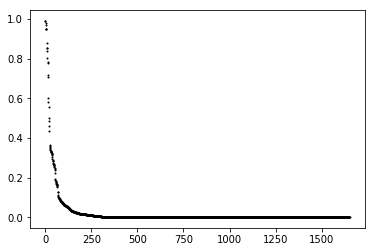

In [4]:
cos_li = sorted(cos_li, key = lambda x: x[1] , reverse = True)
arr = [ i[1] for i in cos_li]
# arr.sum() / len(arr)
plt.figure()
plt.scatter(x = range(len(arr)), y=arr, s = 1, c=  [0,0,0], )
plt.show()


In [5]:
cos_li[:50]


[('000005-20171231-中国人寿保险股份有限公司000018-20171231-中国平安人寿保险股份有限公司',
  0.9905274473745047),
 ('000015-20161231-中国太平洋人寿保险股份有限公司000015-20170331-中国太平洋人寿保险股份有限公司',
  0.9875447233414839),
 ('000014-20170630-中国太平洋财产保险股份有限公司000014-20170930-中国太平洋财产保险股份有限公司',
  0.9783491873569065),
 ('000014-20170930-中国太平洋财产保险股份有限公司000014-20171231-中国太平洋财产保险股份有限公司',
  0.9675183932592163),
 ('000190-20161231-上海人寿保险股份有限公司000190-20170331-上海人寿保险股份有限公司',
  0.950688205296435),
 ('000009-20161231-中国人寿再保险有限责任公司000009-20170331-中国人寿再保险有限责任公司',
  0.9472611915891899),
 ('000014-20170630-中国太平洋财产保险股份有限公司000014-20171231-中国太平洋财产保险股份有限公司',
  0.9463130548056203),
 ('000037-20170930-友邦保险有限公司000037-20171231-友邦保险有限公司', 0.8767471314248669),
 ('000093-20170630-阳光财产保险股份有限公司000093-20171231-阳光财产保险股份有限公司',
  0.8530738516456573),
 ('000037-20170630-友邦保险有限公司000037-20170930-友邦保险有限公司', 0.8507677134048979),
 ('000124-20161231-幸福人寿保险股份有限公司000124-20170331-幸福人寿保险股份有限公司',
  0.8388283310702334),
 ('000037-20170630-友邦保险有限公司000037-20171231-友邦保险有限公司', 0.80

In [57]:
%matplotlib --list


Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


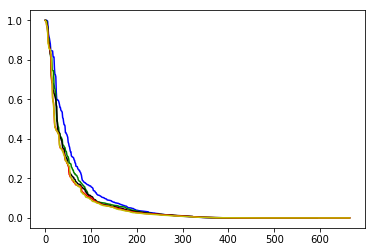

In [22]:
# top 300 600 900 1500 2000
tops = [ 100, 300, 700, 1500, 2000]

colors = 'bgkry'


for  mm,t in enumerate(tops):

    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            seri1 = df.iloc[:,i][:t]
            seri2 = df.iloc[:,j][:t]
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
                
            else:
                # seri1 /= seri1.sum()
                # seri2 /= seri2.sum()
                # seri1 +=  0.0001
                # seri2 +=  0.0001
                
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
                cos_li.append(cos)
        
    # cos 排序后的散点图
    
    arr = sorted(cos_li, reverse = True)
    arr = np.array(arr)
    # print(mm, t)
    
    # plt.scatter(x = range(len(arr)), y=arr, c = colors[mm])
    plt.plot(arr, c = colors[mm])
    
    
    
plt.show()




In [36]:


seri1 = np.array([0.0] * 4000 )


seri1[700] = 999999
seri2 = np.array( [0.0] * 4000 )


seri2 [300] = 99999955
seri2[700] = 9999

seri1 +=  0.0001


seri2 +=  0.0001

np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  



9.999014549566979e-05

In [36]:
# 分位数图
qx  = []
qy = []
for q in range(5,105,5):
    va= np.percentile(arr, q)
    # print(va)
    qx.append(q)
    qy.append(va)

plt.figure()

plt.scatter(qx, qy, )
plt.show()



## 最低资本_dfs_dfs2_alldf

In [8]:
#  所有label的最低资本df； 拼接成为一个长的vector的alldf
# com-date-name
import os
folder = 'MinimumCapital/'
csvs = os.listdir(folder)

dfs = {}
for i in csvs:
    dfs[i.split('.')[0]] = pd.read_csv(folder + i , encoding ="utf8", index_col = 0)


alldf = pd.concat([ i[:1000] for i in dfs.values()])


In [10]:
#  拼成两两合并的 向量
dfs2 = {}
# for label, df in dfs.items():
for  i1, j1 in dfs.items():
    for i2, j2, in dfs.items():
        dfs2[i1+'_'+ i2] = pd.concat( [dfs[i1][:1000], dfs[i2][:1000]] )
    

### cos 相似度

In [11]:
# 两个组合向量的cos绘图
for  name,iii in dfs2.items():
    df = iii
    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            seri1 = df.iloc[:,i]
            seri2 = df.iloc[:,j]
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
            else:
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
            # print(cos)
            cos_li.append(cos)

    arr = np.array(sorted(cos_li, reverse = True))
    # plt.scatter(x= range(len(cos_li)), y = arr) 
    print(name)
    plt.show()    

assets_assets
assets_bond
assets_contract
assets_convertible_bond
assets_equity
assets_forex
assets_fund
assets_overseas
assets_product
assets_real_estate
assets_reinsurance
assets_security
bond_assets
bond_bond
bond_contract
bond_convertible_bond
bond_equity
bond_forex
bond_fund
bond_overseas
bond_product
bond_real_estate
bond_reinsurance
bond_security
contract_assets
contract_bond
contract_contract
contract_convertible_bond
contract_equity
contract_forex
contract_fund
contract_overseas
contract_product
contract_real_estate
contract_reinsurance
contract_security
convertible_bond_assets
convertible_bond_bond
convertible_bond_contract
convertible_bond_convertible_bond
convertible_bond_equity
convertible_bond_forex
convertible_bond_fund
convertible_bond_overseas
convertible_bond_product
convertible_bond_real_estate
convertible_bond_reinsurance
convertible_bond_security
equity_assets
equity_bond
equity_contract
equity_convertible_bond
equity_equity
equity_forex
equity_fund
equity_overseas

In [12]:
alldf.head()

,000005-20170630-中国人寿保险股份有限公司,000005-20170930-中国人寿保险股份有限公司,000005-20171231-中国人寿保险股份有限公司,000009-20161231-中国人寿再保险有限责任公司,000009-20170331-中国人寿再保险有限责任公司,000014-20170630-中国太平洋财产保险股份有限公司,000014-20170930-中国太平洋财产保险股份有限公司,000014-20171231-中国太平洋财产保险股份有限公司,000015-20161231-中国太平洋人寿保险股份有限公司,000015-20170331-中国太平洋人寿保险股份有限公司,...,000190-20161231-上海人寿保险股份有限公司,000190-20170331-上海人寿保险股份有限公司,000190-20170630-上海人寿保险股份有限公司,000199-20170930-泰康在线财产保险股份有限公司,000201-20171231-太平再保险有限公司,000204-20170630-阳光渝融信用保证保险股份有限公司,000204-20170930-阳光渝融信用保证保险股份有限公司,000209-20161231-珠峰财产保险股份有限公司,000209-20170331-珠峰财产保险股份有限公司,000209-20170930-珠峰财产保险股份有限公司
16417,0,0.0,351.61,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17797,0,0.0,1197.87,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15438,0,0.0,4347.68,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15249,0,0.0,3559.63,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59709,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,91378673.15,90073424.26,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# np.ndarray(alldf)
alldf.T.values

array([[   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [ 351.61, 1197.87, 4347.68, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [14]:
# 计算相似度 cos； 0向量相似度为0
# 合并后的向量

df = alldf
cos_li = []
cos_all_dic = {}
cos_pairs = []
for i in range(len(df.columns)):
    for j in range(i+1,len(df.columns) ):
        seri1 = df.iloc[:,i]
        seri2 = df.iloc[:,j]
        if seri1.sum() == 0 or seri2.sum() == 0:
            cos = 0
        else:
            cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
        # print(cos)
        cos_li.append(cos)
        pair = df.columns[i]+"_"+df.columns[j]
        cos_pairs.append(pair)
        cos_all_dic[pair] = cos

# arr = np.array(sorted(cos_li,reverse = True))
# plt.scatter(x= range(len(cos_li)), y = arr) 
# plt.show()

In [15]:
# 总的实际资本和最低资本  df  com	date	real	least	rate	comdate
real_least= pd.read_csv("./real_least.csv", encoding = 'utf8', converters  = {'com':np.str, 'date':np.str, 'rate':np.float})
# real_least= pd.read_csv("./real_least.csv", encoding = 'utf8',)
real_least['comdate'] = real_least['com']+'_'+ real_least['date']
real_least.head()
comdate_df = pd.pivot_table(real_least, values=['real', 'least', 'rate'], index=['comdate'], )
comdate_dic = comdate_df.to_dict('index')
comdate_dic

{'000005_20171231': {'least': 2619923198.0,
  'rate': 0.026307512,
  'real': 68923662.05},
 '000009_20161231': {'least': 4960647506.0,
  'rate': 3.595632042,
  'real': 17836663124.0},
 '000009_20170331': {'least': 5872552552.0,
  'rate': 2.681105687,
  'real': 15744934041.0},
 '000014_20170630': {'least': 13551689170.0,
  'rate': 2.919470178,
  'real': 39563752398.0},
 '000014_20171231': {'least': 13433972854.0,
  'rate': 2.85466708,
  'real': 38349520065.0},
 '000015_20161231': {'least': 24393292978.0,
  'rate': 8.84617118,
  'real': 216000000000.0},
 '000015_20170331': {'least': 29404844153.0,
  'rate': 7.295291073,
  'real': 215000000000.0},
 '000015_20170630': {'least': 66411679488.0,
  'rate': 10.571577699999999,
  'real': 702000000000.0},
 '000018_20171231': {'least': 66411679488.0,
  'rate': 10.571577699999999,
  'real': 702000000000.0},
 '000026_20161231': {'least': 3905067855.0,
  'rate': 1.77344209,
  'real': 6925411699.0},
 '000026_20170331': {'least': 4023723363.0,
  'rate'

In [16]:
assertion = []

for pair, cos in zip(cos_pairs, cos_li):
    if cos == 0:
        continue
    current = []
    current.extend([pair, cos])
    p1 , p2 = pair.split('_')
    p1 = p1.split('-')
    p2 = p2.split('-')
    
    key1 = '_'.join(p1[:2])
    key2 = '_'.join(p2[:2])
    
    if not  (key1 in comdate_dic.keys() and key2 in comdate_dic.keys()):
        continue
    tmp_li = list(comdate_dic[key1].values()) + list(comdate_dic[key2].values())
    flag = False
    for tmp in tmp_li:
#         print(list(comdate_dic[key1].values()) + list(comdate_dic[key2].values()))
#         break;
        if tmp == 0:
            flag = True
    if flag : continue
        
    real1 = comdate_dic[key1]['real']
    real2 = comdate_dic[key2]['real']
    least1 = comdate_dic[key1]['least']
    least2 = comdate_dic[key2]['least']
    rate1 = comdate_dic[key1]['rate']
    rate2 = comdate_dic[key2]['rate']
    
#     print(real2)
    quotient = real1 / real2
    current.append(quotient if quotient <=1 else 1/quotient)
    quotient = least1 / least2
    current.append(quotient if quotient <=1 else 1/quotient)
    quotient = rate1 / rate2
    current.append(quotient if quotient <=1 else 1/quotient)
    
    assertion.append(current)
    
    


In [17]:
len(comdate_dic.keys())

40

In [18]:
assertion_df = pd.DataFrame(assertion, )
# cos50 = assertion_df[assertion_df[1] > 0.01]
cos50 = assertion_df
cos50.columns = ['pair', 'cos', 'real', 'least', 'rate']

In [19]:
# cos50[cos50< 0.5]
cos50.to_csv("assertion_all.csv")

In [20]:
cos50.sort_values(by = ['cos', 'rate', 'real', 'least'], ascending=False). head(10)


,pair,cos,real,least,rate
33,000009-20161231-中国人寿再保险有限责任公司_000009-20170331-...,0.998711,0.882729,0.844717,0.745656
372,000128-20161231-汉诺威再保险股份公司上海分公司_000128-2017033...,0.998356,0.900381,0.987045,0.888716
397,000190-20161231-上海人寿保险股份有限公司_000190-20170331-上...,0.995249,0.994866,0.930935,0.935739
252,000035-20161231-中意人寿保险有限公司_000035-20170331-中意人...,0.993495,0.849431,0.949571,0.806595
275,000037-20170630-友邦保险有限公司_000037-20171231-友邦保险有限公司,0.990455,0.930414,0.888743,0.955212
362,000124-20161231-幸福人寿保险股份有限公司_000124-20170331-幸...,0.985297,0.995951,0.927350,0.923595
392,000140-20170331-浙商财产保险股份有限公司_000140-20170630-浙...,0.980004,0.754792,0.994325,0.759100
197,000026-20161231-太平财产保险有限公司_000026-20170331-太平财...,0.949349,0.918005,0.970511,0.890934
321,000082-20161231-太平养老保险股份有限公司_000082-20170331-太...,0.947366,0.965442,0.979211,0.945372
154,000015-20170630-中国太平洋人寿保险股份有限公司_000018-2017123...,0.932342,1.000000,1.000000,1.000000


In [21]:

from pyecharts import Scatter, Line
scatter = Scatter("cos")
line = Line('cos')
cos_dic = {}
for label, df in dfs.items():
    # only similarity > 0.7
    big_cos_com_date = {}
    
    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            
            
            seri1 = df.iloc[:,i]
            seri2 = df.iloc[:,j]
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
            else:
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
            # print(cos)
            cos_li.append(cos)
            
            if cos > 0.7:
                comdatepair = '_'.join( list(df.columns)[i].split('-')[:2] + list(df.columns)[j].split('-')[:2] )
                big_cos_com_date[comdatepair] = cos
                    # print(type(cos))
    
    cos_dic[label] = big_cos_com_date
    
    arr = np.array(sorted(cos_li, reverse = True))
    
    qx  = []
    qy = []
    for q in range(1,100, 1):
        q /= 100
        # va= np.percentile(arr, q)
        # va 是这个区间相似度的 两两比较的个数
        va = 0
        for ccc in cos_li:
            if q-0.01 <= ccc  <q:
                va+=1
        # print(va)
        # print(q)
        qx.append(q)
        qy.append(va)
    

    scatter.add(label,qx, qy)
    line.add(label,qx, qy)
    

scatter
line

ModuleNotFoundError: No module named 'pyecharts'

In [ ]:
cos_dic

In [ ]:
evaluatecos_dic = {}
for label, dic in cos_dic.items():
    cos_tmp = {}

    for pair, cos in dic.items():
        p1, p2 = "_".join( pair.split('_')[:2] ), "_".join( pair.split('_')[2:] )
        if p1 in comdate_dic.keys() and p2 in comdate_dic.keys():
            cos_tmp[pair] = [cos, comdate_dic[p1]['real'], comdate_dic[p2]['real'],
                comdate_dic[p1]['least'],comdate_dic[p2]['least'],
                comdate_dic[p1]['rate'],comdate_dic[p2]['rate'], ]

    evaluatecos_dic[label] = cos_tmp


In [ ]:
evaluatecos_dfs = {}
for label, dic in evaluatecos_dic.items():
    evaluatecos_dfs[label] =  pd.DataFrame.from_dict(evaluatecos_dic[label], orient='index', )
    try:
        if len(evaluatecos_dfs[label].columns) > 5:
            evaluatecos_dfs[label].columns = ['cos', 'real1', 'real2', 'least2', 'least2', 'rate1', 'rate2']
        else:
            evaluatecos_dfs.pop(label)
    except:
          pass  


In [ ]:
for label, v in evaluatecos_dfs.items():
    v.to_csv(label+"cos70%.csv")

### 绘制  不同的分位数散点图

In [ ]:
# 绘制  不同的分位数散点图
from pyecharts import Scatter, Line
scatter = Scatter("cos")
line = Line('cos')
# scatter.add("all", qx, qy)
for label, df in dfs.items():
    
    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            seri1 = df.iloc[:,i]
            seri2 = df.iloc[:,j]
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
            else:
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
            # print(cos)
            cos_li.append(cos)
                    # print(type(cos))
    arr = np.array(sorted(cos_li, reverse = True))
    
    qx  = []
    qy = []
    for q in range(80,100,3):
        va= np.percentile(arr, q)
        # print(va)
        # print(q)
        qx.append(q)
        qy.append(va)
    

    scatter.add(label,qx, qy)
    line.add(label,qx, qy)
    

scatter
line

### 绘制  频率分布图

In [ ]:

from pyecharts import Scatter, Line
scatter = Scatter("cos")
line = Line('cos')
# scatter.add("all", qx, qy)
for label, df in dfs.items():
    
    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            seri1 = df.iloc[:,i]
            seri2 = df.iloc[:,j]
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
            else:
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
            # print(cos)
            cos_li.append(cos)
                    # print(type(cos))
    arr = np.array(sorted(cos_li, reverse = True))
    
    qx  = []
    qy = []
    for q in range(1,100, 1):
        q /= 100
        # va= np.percentile(arr, q)
        # va 是这个区间相似度的 两两比较的个数
        va = 0
        for ccc in cos_li:
            if q-0.01 <= ccc  <q:
                va+=1
        # print(va)
        # print(q)
        qx.append(q)
        qy.append(va)
    

    scatter.add(label,qx, qy)
    line.add(label,qx, qy)
    

scatter
line

## expo_cost

In [ ]:
# #  分别取dataframe
# import os
# folder = 'expo_cost/'
# csvs = os.listdir(folder)
# dfs = {}
# for i in csvs:
#     dfs[i.split('.')[0]] = pd.read_csv(folder + i , encoding ="utf8", index_col = 0)

In [13]:
# 他们的差

import os
folder = 'expo_cost/'
csvs = os.listdir(folder)
dfs = {}
for i in csvs:
    dfs[i.split('.')[0]] = pd.read_csv(folder + i , encoding ="utf8", index_col = 0)
    dfs[i.split('.')[0]]= dfs[i.split('.')[0]].replace(0,np.nan)
dfs_minus = {}
ex_cost_labels = [
    "equity",
    "stock",
    "convertible_bond",
    "overseas",
    "product",
    "fund",
]  

for label in ex_cost_labels:
    dfs_minus[label+'_minus'] = dfs['expo_'+label ] - dfs['cost_'+ label]

dfs_minus['stock_minus']

,000005-20170630-中国人寿保险股份有限公司,000005-20170930-中国人寿保险股份有限公司,000005-20171231-中国人寿保险股份有限公司,000009-20161231-中国人寿再保险有限责任公司,000009-20170331-中国人寿再保险有限责任公司,000014-20170630-中国太平洋财产保险股份有限公司,000014-20170930-中国太平洋财产保险股份有限公司,000014-20171231-中国太平洋财产保险股份有限公司,000015-20161231-中国太平洋人寿保险股份有限公司,000015-20170331-中国太平洋人寿保险股份有限公司,...,000190-20161231-上海人寿保险股份有限公司,000190-20170331-上海人寿保险股份有限公司,000190-20170630-上海人寿保险股份有限公司,000199-20170930-泰康在线财产保险股份有限公司,000201-20171231-太平再保险有限公司,000204-20170630-阳光渝融信用保证保险股份有限公司,000204-20170930-阳光渝融信用保证保险股份有限公司,000209-20161231-珠峰财产保险股份有限公司,000209-20170331-珠峰财产保险股份有限公司,000209-20170930-珠峰财产保险股份有限公司
3120998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:

for i,j in dfs_minus.items():
    dfs_minus[i] = j.replace(np.nan, 0)
dfs_minus['stock_minus'].describe()
dfs = dfs_minus

In [38]:
dfs_minus['stock_minus'].describe()

,000005-20170630-中国人寿保险股份有限公司,000005-20170930-中国人寿保险股份有限公司,000005-20171231-中国人寿保险股份有限公司,000009-20161231-中国人寿再保险有限责任公司,000009-20170331-中国人寿再保险有限责任公司,000014-20170630-中国太平洋财产保险股份有限公司,000014-20170930-中国太平洋财产保险股份有限公司,000014-20171231-中国太平洋财产保险股份有限公司,000015-20161231-中国太平洋人寿保险股份有限公司,000015-20170331-中国太平洋人寿保险股份有限公司,...,000190-20161231-上海人寿保险股份有限公司,000190-20170331-上海人寿保险股份有限公司,000190-20170630-上海人寿保险股份有限公司,000199-20170930-泰康在线财产保险股份有限公司,000201-20171231-太平再保险有限公司,000204-20170630-阳光渝融信用保证保险股份有限公司,000204-20170930-阳光渝融信用保证保险股份有限公司,000209-20161231-珠峰财产保险股份有限公司,000209-20170331-珠峰财产保险股份有限公司,000209-20170930-珠峰财产保险股份有限公司
count,4129.0,4129.0,4129.000000,4129.0,4129.0,4.129000e+03,4.129000e+03,4.129000e+03,4.129000e+03,4.129000e+03,...,4129.0,4129.0,4129.0,4.129000e+03,4129.0,4.129000e+03,4.129000e+03,4129.0,4129.0,4129.0
mean,0.0,0.0,3.776769,0.0,0.0,-1.564299e+04,-1.815234e+04,3.368322e+03,6.167086e+03,3.647861e+02,...,0.0,0.0,0.0,1.832908e+05,0.0,-4.095498e+05,5.392017e+04,0.0,0.0,0.0
std,0.0,0.0,242.684973,0.0,0.0,1.017439e+06,1.230293e+06,1.952170e+05,2.594008e+06,2.310738e+06,...,0.0,0.0,0.0,4.198198e+06,0.0,2.981872e+07,1.475910e+06,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.0,0.0,-6.537300e+07,-7.895300e+07,0.000000e+00,-1.311040e+08,-8.259410e+07,...,0.0,0.0,0.0,0.000000e+00,0.0,-1.913668e+09,0.000000e+00,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
75%,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
max,0.0,0.0,15594.280000,0.0,0.0,7.831000e+05,4.002000e+06,1.250100e+07,8.710720e+07,8.905840e+07,...,0.0,0.0,0.0,1.361221e+08,0.0,6.690411e+07,6.690411e+07,0.0,0.0,0.0


In [39]:
for i in range (58):
    print(dfs['stock_minus'].iloc[:,i].sum())

0.0
0.0
15594.28
0.0
0.0
-64589900.0
-74951000.0
13907800.0
25463900.0
1506202.0
1221349552.5
1221349552.5
13455186.34
22824652.05
0.0
0.0
16666970.92
0.0
1221349552.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
15935574.38
15935574.38
0.0
0.0
0.0
35548600.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1221349552.5
0.0
0.0
0.0
756807844.67
0.0
-1691031283.84
222636374.16
0.0
0.0
0.0


In [40]:

from pyecharts import Scatter, Line
scatter = Scatter("cos")
line = Line('cos')
# scatter.add("all", qx, qy)
for label, df in dfs.items():
    
    cos_li = []
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns) ):
            seri1 = df.iloc[:,i].replace(np.nan, 0)
            seri2 = df.iloc[:,j].replace(np.nan, 0)
            
            if seri1.sum() == 0 or seri2.sum() == 0:
                cos = 0
            else:
                # print(np.dot(seri1, seri2) )
                cos = np.dot(seri1, seri2) / (np.linalg.norm(seri1)*(np.linalg.norm(seri2)))  
                # print(cos)
          
            cos_li.append(cos)
                    # print(type(cos))
    arr = np.array(sorted(cos_li, reverse = True))
    
    qx  = []
    qy = []
    for q in range(1,100, 1):
        q /= 100
        # va= np.percentile(arr, q)
        # va 是这个区间相似度的 两两比较的个数
        va = 0
        for ccc in cos_li:
            if q-0.01 <= ccc  <q:
                va+=1
        # print(va)
        # print(q)
        qx.append(q)
        qy.append(va)
    

    scatter.add(label,qx, qy, is_datazoom_show= True)
    line.add(label,qx, qy,  is_datazoom_show= True)
    

scatter
line

## temp


## 降维-聚类

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# %matplotlib inline
from sklearn.cluster import DBSCAN



In [9]:
# 转成numpy ndarray
# 删除零向量
X = alldf.T.values
comdatecols = list(alldf.columns)

X = list(X)
length = len(X)
for i,x in enumerate(X[::-1]):
    if x.sum() == 0:
        X.pop(length- 1 - i)
        comdatecols.pop(length- 1 - i)
print(len(X))

X= np.array(X)
# 确认
for i,x in enumerate(X[::-1]):
    if x.sum() == 0:
        print(x)
        

from sklearn.metrics import pairwise
pairwise.paired_cosine_distances

# y_pred = DBSCAN(eps = 0.1, min_samples = 2, metric= 'euclidean').fit_predict(X)
# y_pred = DBSCAN(eps = 0.1, min_samples = 2, metric= 'cosine').fit_predict(X)
from sklearn.cluster import AgglomerativeClustering
y_pred = AgglomerativeClustering(n_clusters=14, affinity='cosine', memory=None, connectivity=None, compute_full_tree='auto', linkage='average',).fit_predict(X)



'''
ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.
'''


# plt.scatter(X[:, 0], X[:, 1], c=y_pred)

cato = set(y_pred)
print(len(cato))

for c in cato:
    print(c, list(y_pred).count(c))
print(comdatecols)
print(y_pred)
pd.DataFrame(comdatecols, y_pred).to_csv("AgglomerativeClustering.csv")

# for c in cato:

#     print("==================")
#     boollist = [ True if c == i else False for i in y_pred ]
#     print(boollist)
    
    # print(type(X[boollist]))
    # ccarr = X[boollist]
    
    
    
    
    # tpd = pd.DataFrame(ccarr) 
    # tpd.to_csv(str(c)+'.csv')

52
14
0 7
1 14
2 2
3 2
4 5
5 4
6 5
7 1
8 2
9 1
10 2
11 2
12 3
13 2
['000005-20170930-中国人寿保险股份有限公司', '000005-20171231-中国人寿保险股份有限公司', '000009-20161231-中国人寿再保险有限责任公司', '000009-20170331-中国人寿再保险有限责任公司', '000014-20170630-中国太平洋财产保险股份有限公司', '000014-20170930-中国太平洋财产保险股份有限公司', '000014-20171231-中国太平洋财产保险股份有限公司', '000015-20161231-中国太平洋人寿保险股份有限公司', '000015-20170331-中国太平洋人寿保险股份有限公司', '000015-20170630-中国太平洋人寿保险股份有限公司', '000018-20171231-中国平安人寿保险股份有限公司', '000026-20161231-太平财产保险有限公司', '000026-20170331-太平财产保险有限公司', '000026-20171231-太平财产保险有限公司', '000027-20170930-太平人寿保险有限公司', '000035-20161231-中意人寿保险有限公司', '000035-20170331-中意人寿保险有限公司', '000037-20170630-友邦保险有限公司', '000037-20170930-友邦保险有限公司', '000037-20171231-友邦保险有限公司', '000054-20170331-招商信诺人寿保险有限公司', '000054-20171231-招商信诺人寿保险有限公司', '000082-20161231-太平养老保险股份有限公司', '000082-20170331-太平养老保险股份有限公司', '000093-20170630-阳光财产保险股份有限公司', '000093-20171231-阳光财产保险股份有限公司', '000124-20161231-幸福人寿保险股份有限公司', '000124-20170331-幸福人寿保险股份有限公司', '000128-20161231-汉诺威再保险股份公司上海分公司', '00

In [109]:
from sklearn.manifold import TSNE
# tsne=TSNE(n_components=2, metric='cosine')

tsne = TSNE(n_components=2, metric= 'euclidean')

tsne.fit_transform(X,)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding_
tsne=pd.DataFrame(tsne.embedding_) #转换数据格式



In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# cs =  [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
# cs = 'bgrcmyk'
cs = [
"#FFB6C1",
"#FFC0CB",
"#800080",
"#87CEFA",
"#00BFFF",
"#F0FFF0",
"#008000",
"#FFFF00",
"#FFD700",
"#FFA500",
"#D2B48C",
"#D2691E",
"#FF4500",
"#FFE4E1",
"#A52A2A",
"#800000",
"#808080",
    
"#000000",
    
    
]
plt.figure()


ax = plt.subplot(111,  )  # 创建一个三维的绘图工程

for c,cc in zip(cato, cs):
    
    boollist = [ True if c == i else False for i in y_pred ]
    d = tsne[boollist]
    ax.scatter(d[0],d[1], c= cc)
    
plt.show()

In [99]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=3, metric='cosine')

tsne.fit_transform(X,)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding_
tsne=pd.DataFrame(tsne.embedding_) #转换数据格式

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# cs =  [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
# cs = 'bgrcmyk'
cs = [
"#FFB6C1",
"#FFC0CB",
"#800080",
"#87CEFA",
"#00BFFF",
"#F0FFF0",
"#008000",
"#FFFF00",
"#FFD700",
"#FFA500",
"#D2B48C",
"#D2691E",
"#FF4500",
"#FFE4E1",
"#A52A2A",
"#800000",
"#808080",
"#000000",
    
    
]

ax = plt.subplot(111, projection = '3d' )  # 创建一个三维的绘图工程

for c,cc in zip(cato, cs):
    
    boollist = [ True if c == i else False for i in y_pred ]
    d = tsne[boollist]
    ax.scatter(d[0],d[1], d[2], c= cc)
 







In [95]:
%matplotlib 



plt.show()



Using matplotlib backend: TkAgg


In [52]:
>>> from sklearn.cluster import KMeans
>>> import numpy as np
X = alldf.T.values
>>> kmeans = KMeans(n_clusters=9, random_state=0).fit(X)
# print(kmeans.labels_)
y_pred = kmeans.labels_
cato = set(y_pred)
for c in cato:
    print(c, list(y_pred).count(c))
# print(cato)
# print(y_pred)

for c in cato:
    print("==================")
    boollist = [ c == i for i in y_pred]
    # print(type(X[boollist]))
    ccarr = X[boollist]
    tpd = pd.DataFrame(ccarr) 
    tpd.to_csv(str(c)+'.csv')

0 47
1 2
2 1
3 1
4 1
5 1
6 2
7 1
8 2
